<a href="https://colab.research.google.com/github/gaojing33/Stat-Data-Science/blob/main/Waste_generation_within_the_EU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                            OLS Regression Results                            
Dep. Variable:       Per Capita Waste   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     157.3
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           4.69e-33
Time:                        09:58:39   Log-Likelihood:                -4963.6
No. Observations:                 800   AIC:                             9931.
Df Residuals:                     798   BIC:                             9941.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

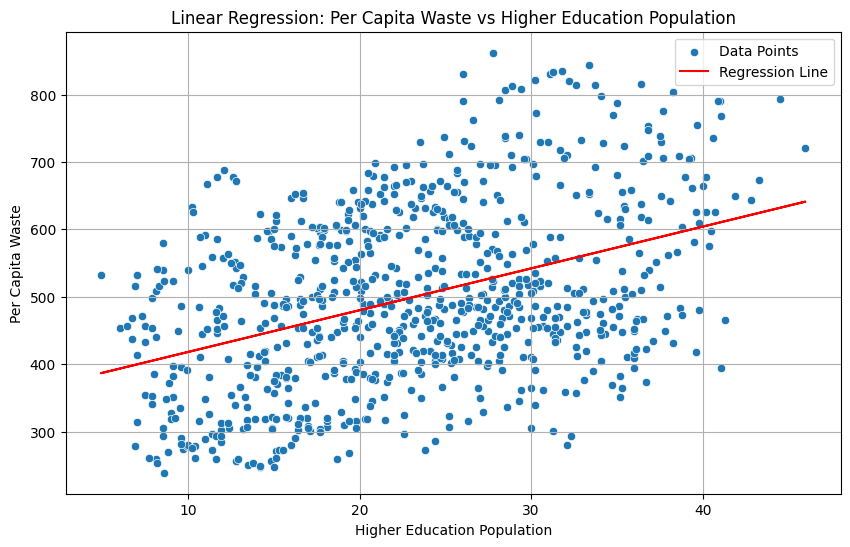

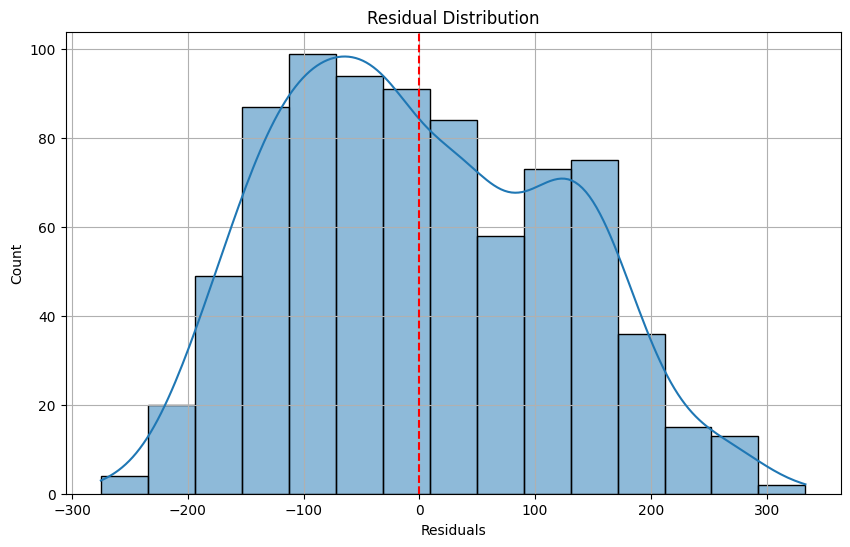

Mean of residuals: -0.00
Standard deviation of residuals: 119.77


In [2]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data from the CSV file
file_path = '/content/Merged_Higher_Education_and_Waste_Data.csv'
df = pd.read_csv(file_path)

# Step 3: Data cleaning - Drop rows with missing values in either column
df_clean = df.dropna(subset=['Higher Education Population', 'Per Capita Waste'])

# Step 4: Define the independent (X) and dependent (Y) variables for the regression
X = df_clean['Higher Education Population']
Y = df_clean['Per Capita Waste']

# Step 5: Add a constant to the independent variable (required for statsmodels)
X = sm.add_constant(X)

# Step 6: Fit the regression model using statsmodels
model = sm.OLS(Y, X).fit()

# Step 7: Display the regression results
print(model.summary())

# Step 8: Plot the regression line with the data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Higher Education Population', y='Per Capita Waste', data=df_clean, label='Data Points')
plt.plot(df_clean['Higher Education Population'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Higher Education Population')
plt.ylabel('Per Capita Waste')
plt.title('Linear Regression: Per Capita Waste vs Higher Education Population')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Residual analysis - Plot residuals
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.grid(True)
plt.show()

# Additional residual metrics
print(f'Mean of residuals: {np.mean(residuals):.2f}')
print(f'Standard deviation of residuals: {np.std(residuals):.2f}')
